**Import and understand the data**

In [3]:
sales= pd.read_csv('data/sales_data.csv', index_col='User_ID', encoding = "unicode_escape")

In [4]:
sales.head()

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
User_ID,,,,,,,,,,,,,,
1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
sales.info() #notice how almost all the columns except status and unnmaed have non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11251 entries, 1002903 to 1002744
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cust_name         11251 non-null  object 
 1   Product_ID        11251 non-null  object 
 2   Gender            11251 non-null  object 
 3   Age Group         11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.3+ MB


In [11]:
sales.describe()

,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [12]:
sales.dtypes

Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

**Clean the data**
- Remove the empty columns
- Handle the null values
- Make Martial_Status: 0 as 'U': unmarried and 1 as 'M': married

In [13]:
#drop empty columns
sales.drop(['Status', 'unnamed1'], inplace= True, axis= 1)

In [17]:
pd.isnull(sales).sum()

Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
sales.head(10) #notice User_ID== 1002092 contains a null value in amount column

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
User_ID,,,,,,,,,,,,
1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00


In [20]:
#handling null values
sales.fillna(value=sales['Amount'].mean(), inplace=True)

In [21]:
sales.head(10) #notice User_ID== 1002092 acquires value of mean of Amount column

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
User_ID,,,,,,,,,,,,
1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.000000
1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.000000
1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.000000
1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.000000
1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.000000
1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.000000
1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.000000
1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,9453.610858
1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.000000


In [23]:
#one last check
pd.isnull(sales['Amount']).sum()

0

In [51]:
sales['Marital_Status'] = sales['Marital_Status'].map({0: 'U', 1: 'M'})

In [52]:
sales.head(1)

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
User_ID,,,,,,,,,,,,,,
1002903,Sanskriti,P00125942,F,26-35,28,U,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN


**Let's do some EDA( Exploratory data analysis)**

In [30]:
#lets count gender of different customers
sales['Gender'].value_counts()

F    7842
M    3409
Name: Gender, dtype: int64

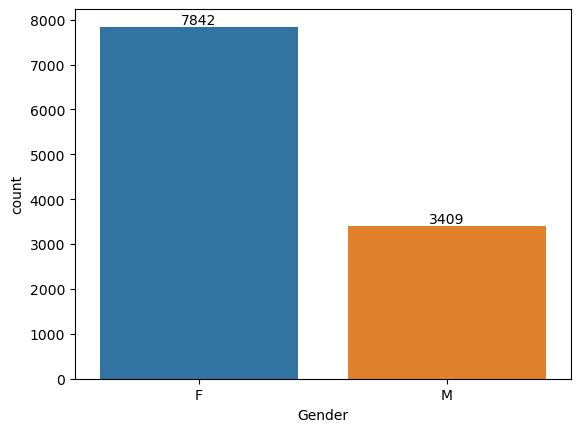

In [33]:
#lets plot a graph
plot= sc.countplot(x= 'Gender', data= sales)

for col in plot.containers:
    plot.bar_label(col)

In [50]:
#lets check the amount of monet spent by each gender and plot a count plot
df= sales.groupby(['Gender'], as_index= False)['Amount'].sum()
df

,Gender,Amount
0,F,7.443039e+07
1,M,3.193218e+07


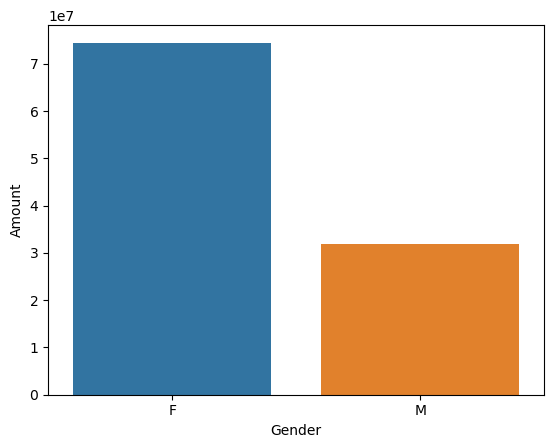

In [52]:
plots= sc.barplot(x='Gender', y= 'Amount', data= df)


*From the above analyis, we can definietly conclude that females have higher purchasing power and even the count of female buyers is greater than men.*

In [53]:
#lets analyse age of customers
sales['Age'].value_counts()

30    522
26    494
28    460
29    454
31    448
     ... 
81      8
70      7
92      7
59      7
62      5
Name: Age, Length: 81, dtype: int64

In [54]:
sales['Age Group'].value_counts() #nice

26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: Age Group, dtype: int64

<Axes: xlabel='Age Group', ylabel='count'>

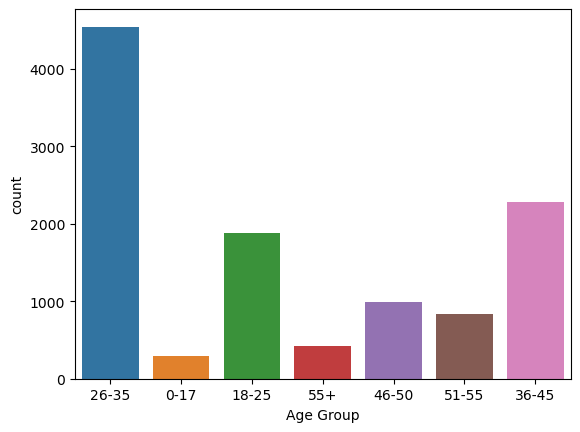

In [58]:
#lets plot a graph
sc.countplot(x= 'Age Group', data= sales)

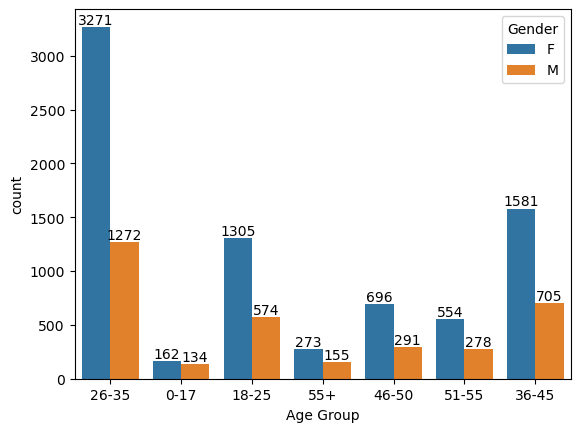

In [60]:
#lets count men and women customer in each age group
plots= sc.countplot(x= 'Age Group', data= sales, hue='Gender')
for plot in plots.containers:
    plots.bar_label(plot)

In [ ]:
sales.groupby(['Age Group'])['Gender'].value_counts()

<Axes: title={'center': 'Gender distribution for male and female in age group 26-35'}, ylabel='Gender'>

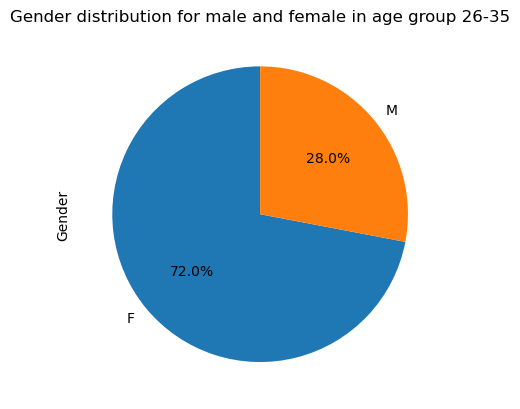

In [22]:
sales.loc[sales['Age Group']== '26-35']['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title= 'Gender distribution for male and female in age group 26-35')

*From above analysis, we can conclude that 26-35 age group people shop the most, and in 26-35 age group 72% are female*

In [36]:
#let's analyse orders placed by different states.
df= sales.groupby(['State'], as_index=False)['Orders'].sum().sort_values(['Orders'], ascending=False)
df


,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Bihar'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

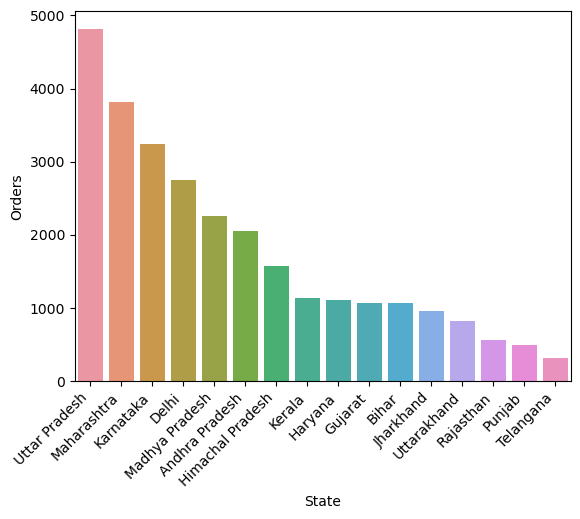

In [37]:
sc.barplot(x='State', y= 'Orders', data= df)
plt.pyplot.xticks(rotation=45, ha='right')

*From the above analysis, we can conclude, Uttar Pradesh is the highest ordering state.*

In [38]:
#lets analyse the amount of money spend by different states.
df= sales.groupby(['State'], as_index=False)['Amount'].sum().sort_values(['Amount'], ascending=False)
df

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Kerala'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

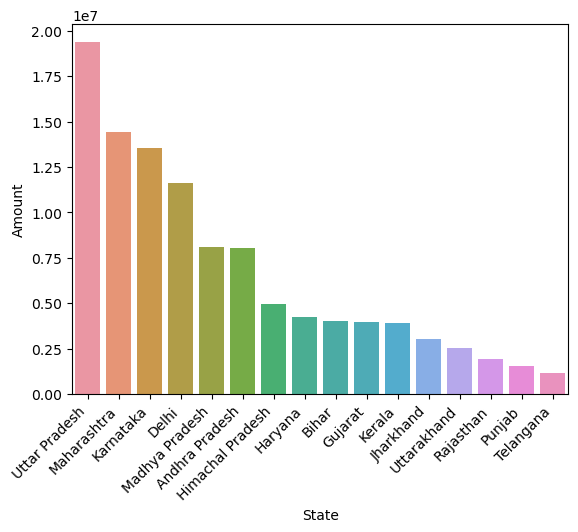

In [40]:
#lets plot a graph
sc.barplot(x='State', y= 'Amount', data= df)
plt.pyplot.xticks(rotation=45, ha='right')

In [47]:
#lets analyse maritial status
sales['Marital_Status'].value_counts()

0    6522
1    4729
Name: Marital_Status, dtype: int64

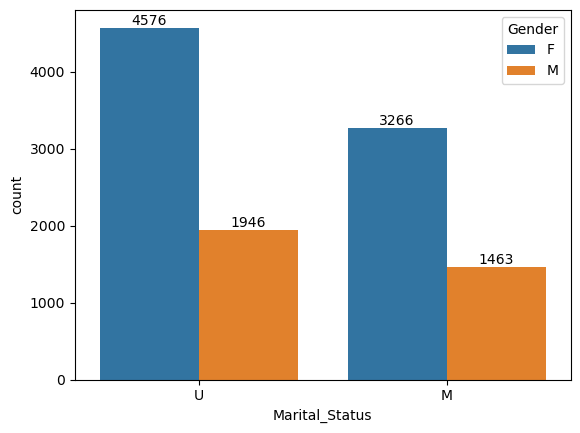

In [53]:
#let's plot a graph with realted to gender
plots= sc.countplot(x='Marital_Status', data= sales, hue= 'Gender')
for plot in plots.containers:
    plots.bar_label(plot)

*from above analysis, conclusion can be drawn is married unmarried women are shopping more comparing unmarried men, married men and merried women*

In [60]:
#lets analyse the occupation regarding amount spent.
df= sales.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(['Amount'], ascending=False)
df

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

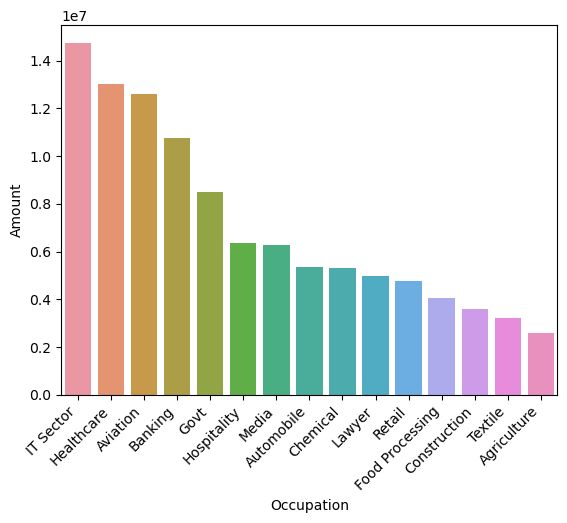

In [62]:
sc.barplot(x= 'Occupation', y='Amount', data= df)
plt.pyplot.xticks(rotation=45, ha='right')

*IT sector has highest purchasing power followed by healthcare*

In [64]:
#finally, lets analyse product category with both number of orders and amount spent.
df= sales.groupby('Product_Category', as_index=False)['Orders'].sum().sort_values(['Orders'], ascending=False)
df

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6120
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2654
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,890
14,Sports Products,870
13,Pet Care,536


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Clothing & Apparel'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Household items'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Games & Toys'),
  Text(7, 0, 'Furniture'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Pet Care'),
  Text(10, 0, 'Stationery'),
  Text(11, 0, 'Office'),
  Text(12, 0, 'Auto'),
  Text(13, 0, 'Books'),
  Text(14, 0, 'Decor'),
  Text(15, 0, 'Veterinary'),
  Text(16, 0, 'Tupperware'),
  Text(17, 0, 'Hand & Power Tools')])

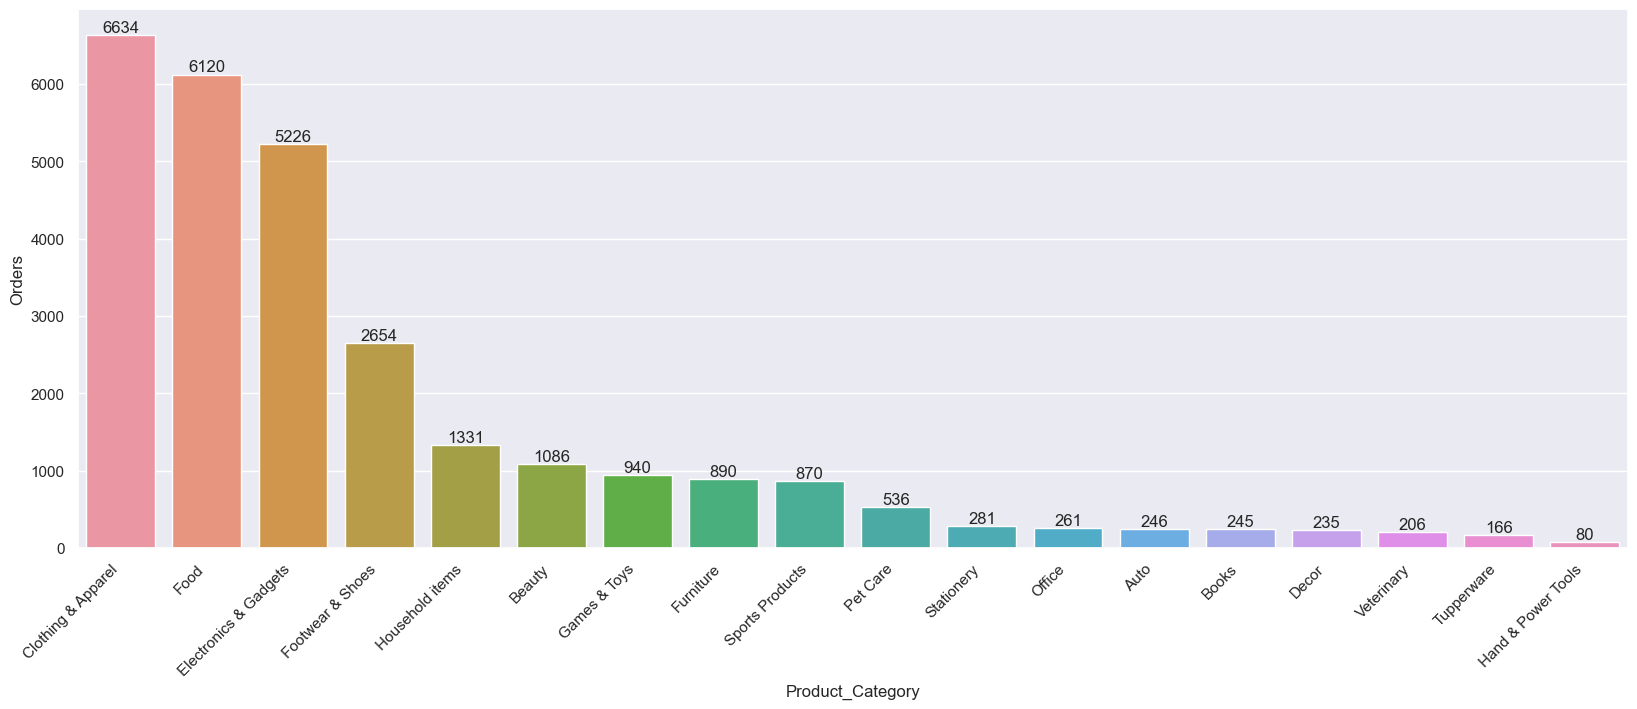

In [72]:
plots= sc.barplot(x= 'Product_Category', y= 'Orders', data= df)
for plot in plots.containers:
    plots.bar_label(plot)

sc.set(rc= {'figure.figsize': (20,7)})
plt.pyplot.xticks(rotation=45, ha='right')

*from the above analysis, we can conclude people are ordering clothing products most followed by food and electronics gagets*

In [73]:
df= sales.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(['Amount'], ascending=False)
df

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

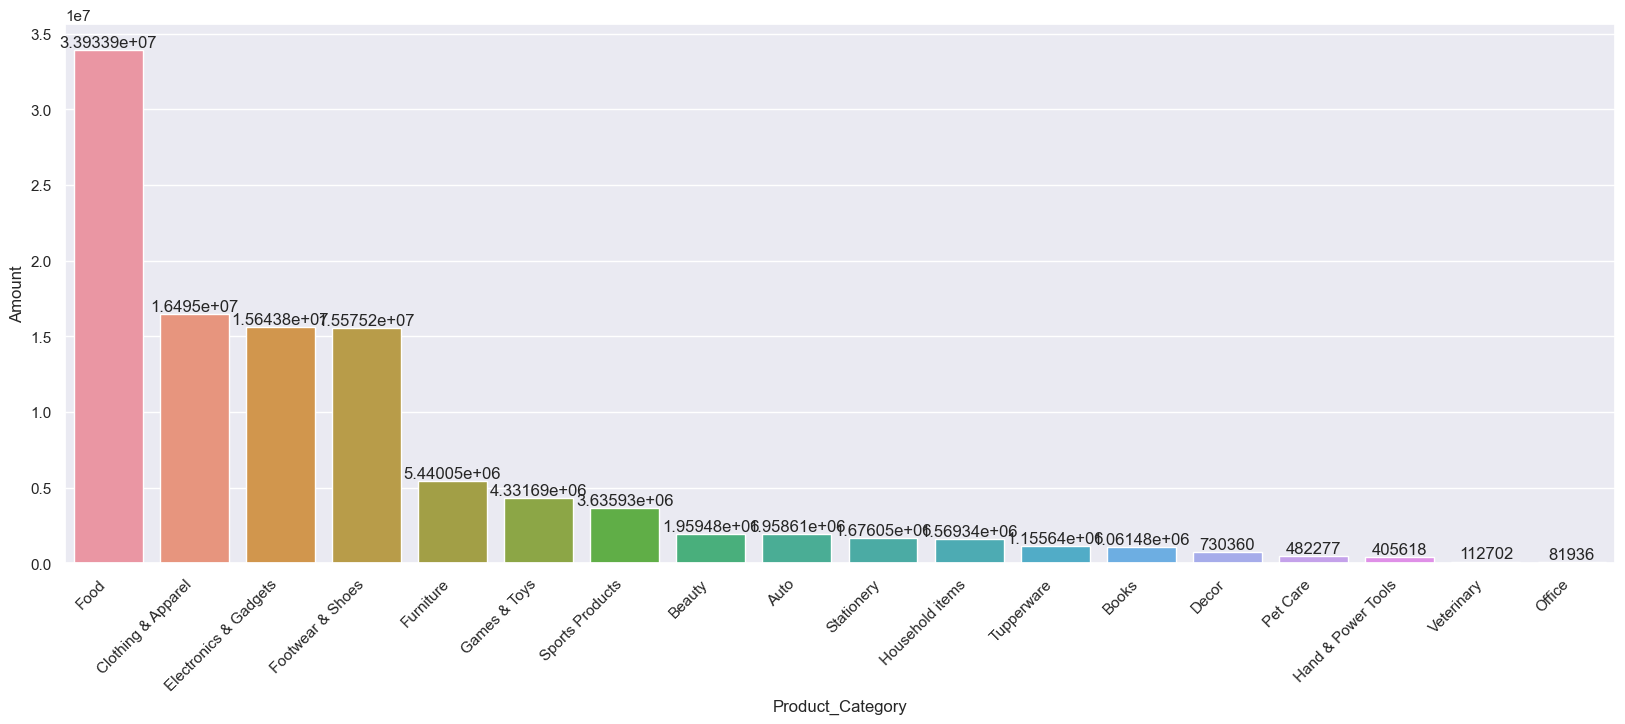

In [74]:
plots= sc.barplot(x= 'Product_Category', y= 'Amount', data= df)
for plot in plots.containers:
    plots.bar_label(plot)

sc.set(rc= {'figure.figsize': (20,7)})
plt.pyplot.xticks(rotation=45, ha='right')

*we can clearly conclude that people are spending more amount of money of food comparing more orders for clothing*

**Conclusion Drawned**
* Unmarried women from IT, healthcare and aviation sector spends a lot of money on food, clothing and electronic prodicts